## Ejemplo 3: Scatterplots por categorías

### 1. Objetivos:
- Aprender a generar e interpretar scatterplots por categorías
 
---
    
### 2. Desarrollo:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/athlete_olympic_events-clean.csv', index_col=0)

df.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None


In [3]:
df_grouped = df.groupby('name')[['height', 'weight', 'sex', 'team', 'sport']].max()

In [6]:
china = df_grouped[df_grouped['team'] == 'China']

He aquí una gráfica de dispersión para observar la relación entre las variables 'weight' y 'height' de los atletas chinos que han participado en Olimpiadas:

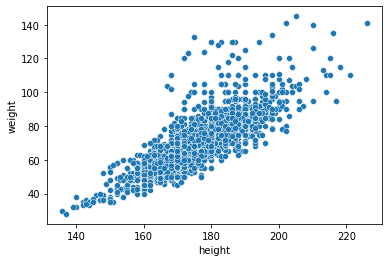

In [7]:
sns.scatterplot(x=china['height'],y=china['weight']);

Si queremos hacer una visualización comparativa entre los atletas hombres y mujeres de nuestro dataset de China, podemos entonces colorear nuestros puntos de acuerdo a la variable 'sex':

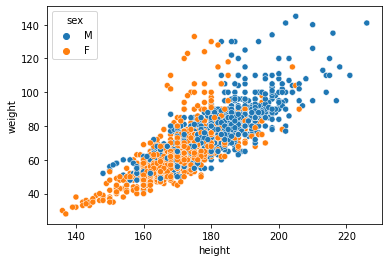

In [8]:
sns.scatterplot(x=china['height'],y=china['weight'], hue=china['sex']);

Podemos hacer la diferencia aún más marcada si cambiamos la forma de los puntos de una de las dos categorías:

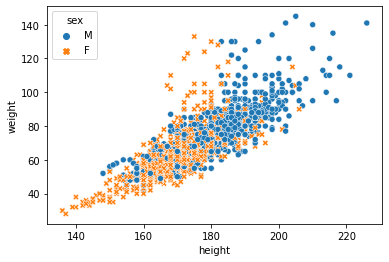

In [9]:
sns.scatterplot(x=china['height'],y=china['weight'], hue=china['sex'], style=china['sex']);

Esta gráfica nos hace ver con mucha claridad que sí hay una diferencia cuantificable entre los pesos y alturas de atletas masculinos y femeninos. También genera preguntas interesantes. Por ejemplo: ¿qué deporte realizan las atletas mujeres que tienen pesos cercanos al peso máximo?

In [10]:
china[(china['sex'] == 'F') & (china['weight'] > 120)]

,height,weight,sex,team,sport
name,,,,,
Meng Suping,173.0,123.0,F,China,Weightlifting
Sun Fuming,178.0,124.0,F,China,Judo
Tong Wen,180.0,130.0,F,China,Judo
Yu Song,182.0,128.0,F,China,Judo
Zhou Lulu,175.0,133.0,F,China,Weightlifting


¡Como era de esperarse, los pesos pesados entre las atletas mujeres de China hacen practican alterofilia y judo!